#Data
Real estate prices dataset.

Objective: The goal is to understand the **relationship** between house features and how these
variables affect the house price.
Using more than one model, predict the price of the house using the given dataset. Please **compare** the
accuracy of the models along with the **drawbacks** of each technique's assumptions before recommending
the final prediction model.


#features
Transaction date: The date of the real estate transaction. The date is a decimal of the whole year.

House age: The house age in years. 

Distance to the nearest MRT station: Distace to Mass Rapid Transit/Metro Station.

The number of nearby Convenience Stores: Grocery Stores/ Marts etc

Latitude and Longitude: Location Data

House price (per unit area): To Build a model to predict it.

Importing the necessary libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Reading Data

In [ ]:
df = pd.read_excel('/content/DS - Assignment Part 1 data set.xlsx') 
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


Data Pre-processing

In [ ]:
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

Renaming Columns

In [ ]:
df.rename(columns = {'Transaction date':'date', 'House Age':'age',
       'Distance from nearest Metro station (km)':'distMrt',
       'Number of convenience stores':'stores', 'latitude':'lat', 'longitude':'long',
       'Number of bedrooms':'rooms', 'House size (sqft)':'size', 'House price of unit area':'price'}, inplace = True)

In [ ]:
df.columns

Index(['date', 'age', 'distMrt', 'stores', 'lat', 'long', 'rooms', 'size',
       'price'],
      dtype='object')

In [ ]:
df.shape  # Checking the shape of the dataset.

(414, 9)

In [ ]:
df.describe

<bound method NDFrame.describe of             date   age     distMrt  stores       lat       long  rooms  size  \
0    2012.916667  32.0    84.87882      10  24.98298  121.54024      1   575   
1    2012.916667  19.5   306.59470       9  24.98034  121.53951      2  1240   
2    2013.583333  13.3   561.98450       5  24.98746  121.54391      3  1060   
3    2013.500000  13.3   561.98450       5  24.98746  121.54391      2   875   
4    2012.833333   5.0   390.56840       5  24.97937  121.54245      1   491   
..           ...   ...         ...     ...       ...        ...    ...   ...   
409  2013.000000  13.7  4082.01500       0  24.94155  121.50381      3   803   
410  2012.666667   5.6    90.45606       9  24.97433  121.54310      2  1278   
411  2013.250000  18.8   390.96960       7  24.97923  121.53986      1   503   
412  2013.000000   8.1   104.81010       5  24.96674  121.54067      1   597   
413  2013.500000   6.5    90.45606       9  24.97433  121.54310      2  1097   

     

In [ ]:
df.info

<bound method DataFrame.info of             date   age     distMrt  stores       lat       long  rooms  size  \
0    2012.916667  32.0    84.87882      10  24.98298  121.54024      1   575   
1    2012.916667  19.5   306.59470       9  24.98034  121.53951      2  1240   
2    2013.583333  13.3   561.98450       5  24.98746  121.54391      3  1060   
3    2013.500000  13.3   561.98450       5  24.98746  121.54391      2   875   
4    2012.833333   5.0   390.56840       5  24.97937  121.54245      1   491   
..           ...   ...         ...     ...       ...        ...    ...   ...   
409  2013.000000  13.7  4082.01500       0  24.94155  121.50381      3   803   
410  2012.666667   5.6    90.45606       9  24.97433  121.54310      2  1278   
411  2013.250000  18.8   390.96960       7  24.97923  121.53986      1   503   
412  2013.000000   8.1   104.81010       5  24.96674  121.54067      1   597   
413  2013.500000   6.5    90.45606       9  24.97433  121.54310      2  1097   

     pr

Checking Data Type

In [ ]:
display(df.dtypes)

date       float64
age        float64
distMrt    float64
stores       int64
lat        float64
long       float64
rooms        int64
size         int64
price      float64
dtype: object

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
print(X)

[[2.01291667e+03 3.20000000e+01 8.48788200e+01 ... 1.21540240e+02
  1.00000000e+00 5.75000000e+02]
 [2.01291667e+03 1.95000000e+01 3.06594700e+02 ... 1.21539510e+02
  2.00000000e+00 1.24000000e+03]
 [2.01358333e+03 1.33000000e+01 5.61984500e+02 ... 1.21543910e+02
  3.00000000e+00 1.06000000e+03]
 ...
 [2.01325000e+03 1.88000000e+01 3.90969600e+02 ... 1.21539860e+02
  1.00000000e+00 5.03000000e+02]
 [2.01300000e+03 8.10000000e+00 1.04810100e+02 ... 1.21540670e+02
  1.00000000e+00 5.97000000e+02]
 [2.01350000e+03 6.50000000e+00 9.04560600e+01 ... 1.21543100e+02
  2.00000000e+00 1.09700000e+03]]


In [ ]:
print(y)

[ 37.9  42.2  47.3  54.8  43.1  32.1  40.3  46.7  18.8  22.1  41.4  58.1
  39.3  23.8  34.3  50.5  70.1  37.4  42.3  47.7  29.3  51.6  24.6  47.9
  38.8  27.   56.2  33.6  47.   57.1  22.1  25.   34.2  49.3  55.1  27.3
  22.9  25.3  47.7  46.2  15.9  18.2  34.7  34.1  53.9  38.3  42.   61.5
  13.4  13.2  44.2  20.7  27.   38.9  51.7  13.7  41.9  53.5  22.6  42.4
  21.3  63.2  27.7  55.   25.3  44.3  50.7  56.8  36.2  42.   59.   40.8
  36.3  20.   54.4  29.5  36.8  25.6  29.8  26.5  40.3  36.8  48.1  17.7
  43.7  50.8  27.   18.3  48.   25.3  45.4  43.2  21.8  16.1  41.   51.8
  59.5  34.6  51.   62.2  38.2  32.9  54.4  45.7  30.5  71.   47.1  26.6
  34.1  28.4  51.6  39.4  23.1   7.6  53.3  46.4  12.2  13.   30.6  59.6
  31.3  48.   32.5  45.5  57.4  48.6  62.9  55.   60.7  41.   37.5  30.7
  37.5  39.5  42.2  20.8  46.8  47.4  43.5  42.5  51.4  28.9  37.5  40.1
  28.4  45.5  52.2  43.2  45.1  39.7  48.5  44.7  28.9  40.9  20.7  15.6
  18.3  35.6  39.4  37.4  57.8  39.6  11.6  55.5  5

Taking care of missing data

In [ ]:
#Checking any null values.
df.isna().sum()

date       0
age        0
distMrt    0
stores     0
lat        0
long       0
rooms      0
size       0
price      0
dtype: int64

Finding Duplicates

In [ ]:
df.duplicated().sum()

0

No Dulpicates Values

Converting Decimal Dates to Only Year

In [ ]:
df['date'] = np.floor(df['date']).astype('int').astype('category')

In [ ]:
df['date']

0      2012
1      2012
2      2013
3      2013
4      2012
       ... 
409    2013
410    2012
411    2013
412    2013
413    2013
Name: date, Length: 414, dtype: category
Categories (2, int64): [2012, 2013]

EDA

Year Vs House Price

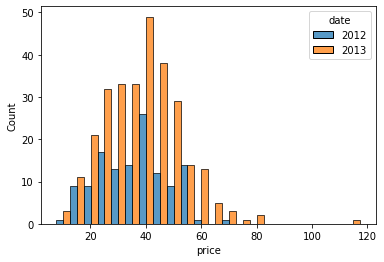

In [ ]:
plt.figure()
sns.histplot(data = df, hue = 'date', x = 'price', multiple = 'dodge')

Distribution of House Price ( Per Unit Area )

Text(0.5, 1.0, 'Distribution of House Price per Unit Area')

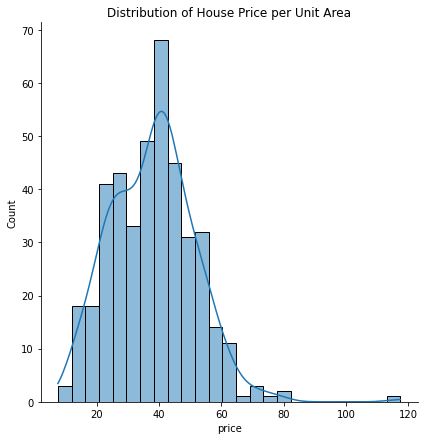

In [ ]:
sns.displot(data= df, x='price' , bins=25 , kde=True, height=6)
plt.title("Distribution of House Price per Unit Area")

Distribution Transaction date

Text(0.5, 1.0, 'Distribution of House Age')

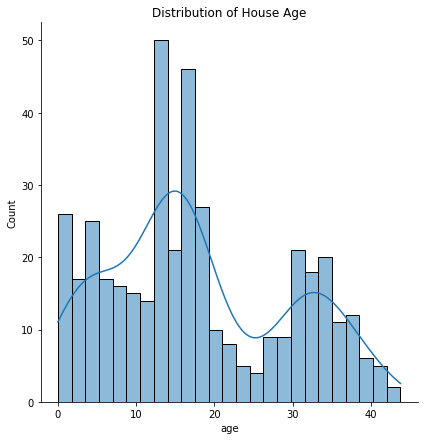

In [ ]:
sns.displot(data= df, x='age' , bins=25 , kde=True, height=6)
plt.title("Distribution of House Age")

Distribution of distance to the nearest MRT station

Text(0.5, 1.0, 'Distribution of distance to the nearest MRT station')

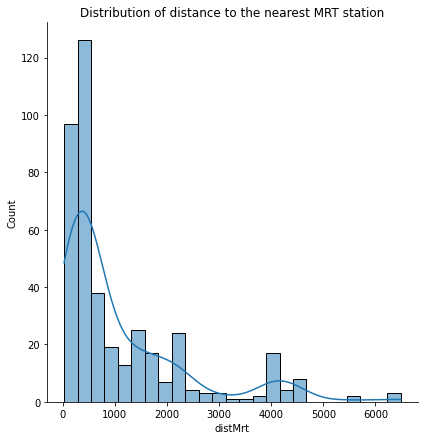

In [ ]:
sns.displot(data= df, x='distMrt' , bins=25 , kde=True, height=6)
plt.title("Distribution of distance to the nearest MRT station")


Distribution of the number of Nearby convenience stores

Text(0.5, 1.0, 'Distribution of number of Nearby convenience stores')

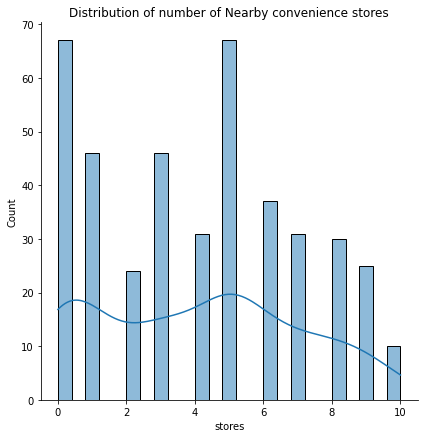

In [ ]:
sns.displot(data= df, x='stores' , bins=25 , kde=True, height=6)
plt.title("Distribution of number of Nearby convenience stores")

Distribution of Latitude

Text(0.5, 1.0, 'Distribution of latitude')

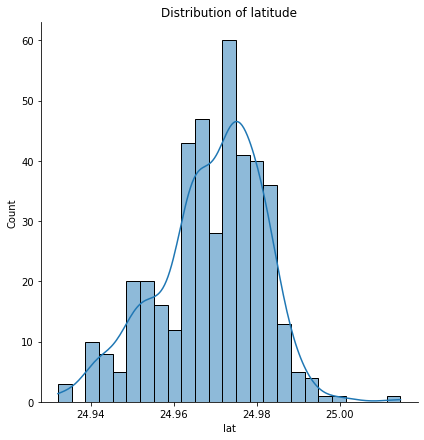

In [ ]:
sns.displot(data= df, x='lat' , bins=25 , kde=True, height=6)
plt.title("Distribution of latitude")

Distribution of Longitude

Text(0.5, 1.0, 'Distribution of longitude')

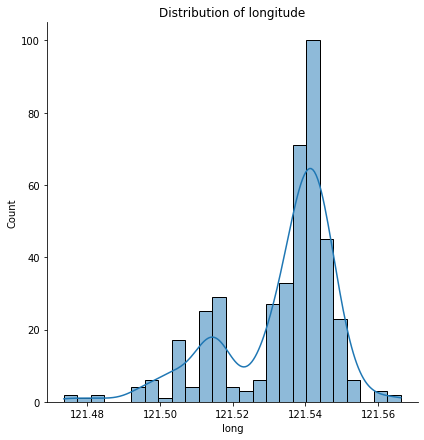

In [ ]:
sns.displot(data= df, x='long' , bins=25 , kde=True, height=6)
plt.title("Distribution of longitude")

Map Visualization

In [ ]:
df['lat'].describe().astype(int)

count    414
mean      24
std        0
min       24
25%       24
50%       24
75%       24
max       25
Name: lat, dtype: int64

In [ ]:
df['long'].describe().astype(int)

count    414
mean     121
std        0
min      121
25%      121
50%      121
75%      121
max      121
Name: long, dtype: int64

In [ ]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 864 kB 5.1 MB/s 
     |████████████████████████████████| 6.3 MB 53.9 MB/s 
     |████████████████████████████████| 46 kB 4.2 MB/s 
     |████████████████████████████████| 30.5 MB 1.4 MB/s 


In [ ]:
import folium
import sys

#reload(sys)                         # for python 2 only
#sys.setdefaultencoding('utf8')      # for python 2 only, in py3 it works by default

#create a map
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    folium.CircleMarker(location=[point.lat,point.long],
                        radius=5,
                        weight=2,
                        popup = point.price,
                        fill_color='red').add_to(this_map)

df.apply(plotDot, axis = 1)
this_map.fit_bounds(this_map.get_bounds())

In [ ]:
this_map

Time Series Analysis

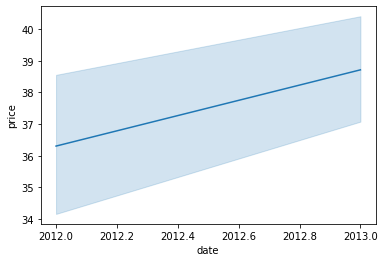

In [ ]:
#Price vs Year
sns.lineplot(x='date',y='price',data=df)

#Outliers

Changing Strings to Float

In [ ]:
df = df.astype(float)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


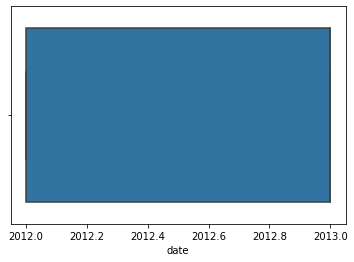

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


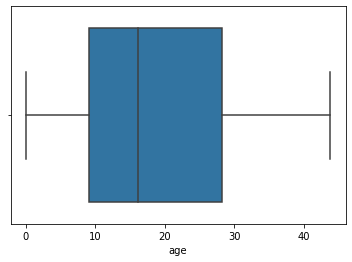

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


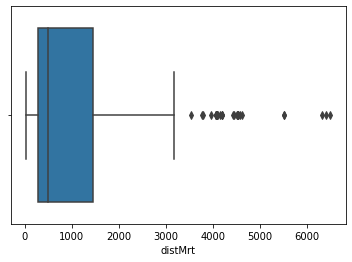

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


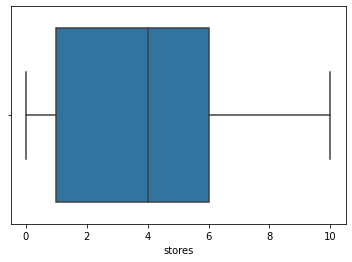

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


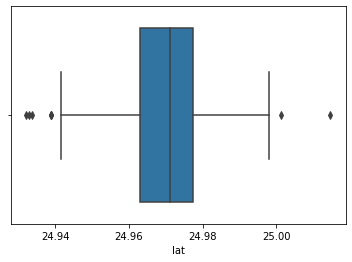

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


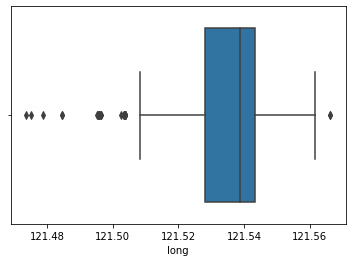

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


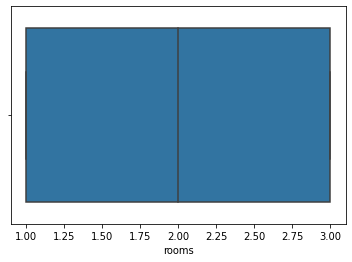

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


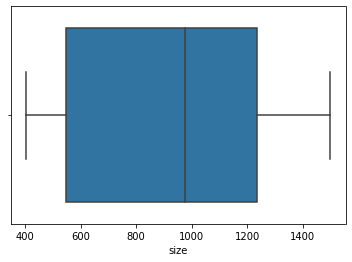

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


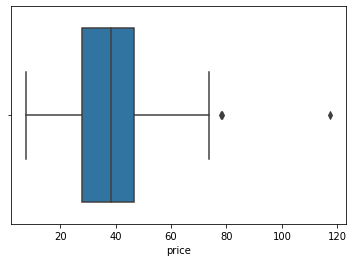

In [ ]:
cols = ['date','age', 'distMrt', 'stores', 'lat', 'long', 'rooms', 'size',
       'price' ]
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

Correlation Between Features

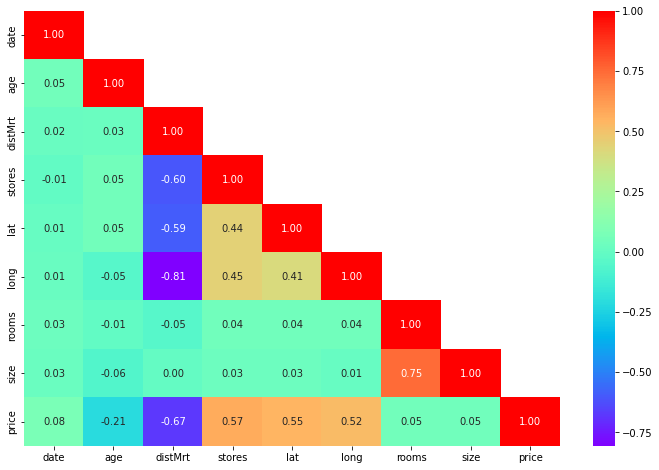

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df.corr(),+1))
plt.show()

Outlier treatment :

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for column in df[cols].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


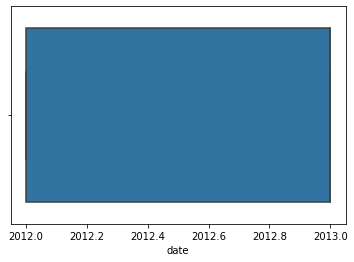

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


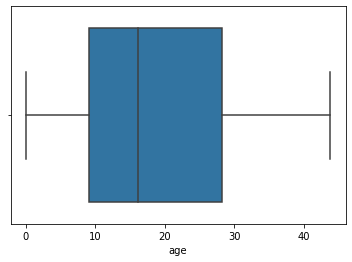

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


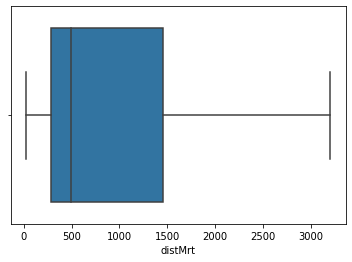

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


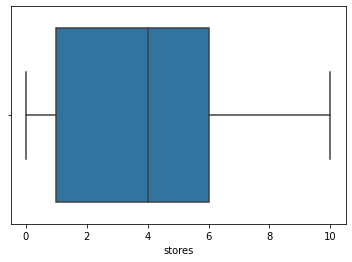

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


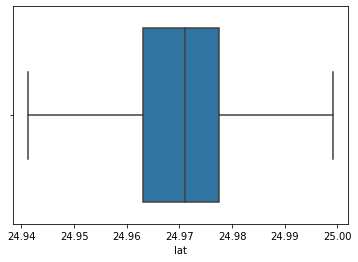

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


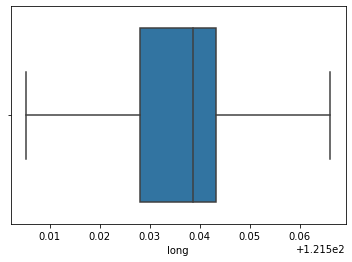

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


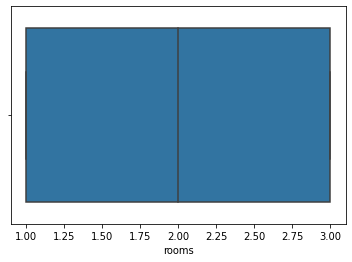

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


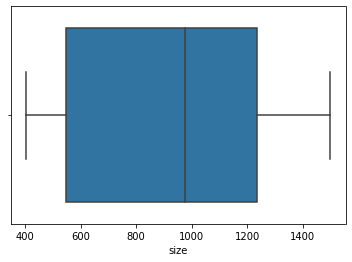

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


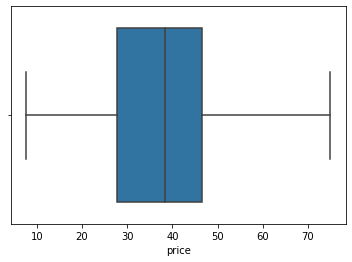

In [ ]:
cols = ['date','age', 'distMrt', 'stores', 'lat', 'long', 'rooms', 'size',
       'price']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

#Pipelines

Pipelines function by allowing a linear series of data transforms to be linked together, resulting in a measurable modeling process. Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1

In [ ]:
dfm = df.copy()#Cloning Data Set for Model Building

In [ ]:
#importing all the packages

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [ ]:
#splitting the dfmset in test and train dfm. The Price will be the Target and the other columns the features:

#X = dfm.drop('price', axis = 1)
#y = dfm['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#Building the Pipelines

#Linear Regression
lr_pipeline = Pipeline([
    ('scaler_1', StandardScaler()),
    ('lr_classifier', LinearRegression())
])

#KNN
knn_pipeline = Pipeline([
    ('scaler_2', StandardScaler()),
    ('knn_classifier', KNeighborsRegressor())
])

#XGB
xgb_pipeline = Pipeline([
    ('scaler_3', StandardScaler()),
    ('xgb_classifier', XGBRegressor())
])

#Decision Tree
dt_pipeline = Pipeline([
    ('scaler_4', StandardScaler()),
    ('dt_classifier', DecisionTreeRegressor())
])

#Random Forest
rf_pipeline = Pipeline([
    ('scaler_5', StandardScaler()),
    ('rf_classifier', RandomForestRegressor())
])

#Gamma GLM Considering the house price can only be nonnegative, the linear model above is actually not adequate as it allows for negative values. A better model is the
# Gamma Generalized Linear Mode (GLM) with log link, which is also implemented in the sklearn package

from sklearn.linear_model import GammaRegressor
glm_pipeline=Pipeline([('scaler_6',StandardScaler()),('glm_classifier',GammaRegressor())])

pipelines = [lr_pipeline, knn_pipeline, xgb_pipeline, dt_pipeline, rf_pipeline, glm_pipeline]
models = ['Linear Regression', 'KNN', 'XGB', 'Decision Tree', 'Random Forest', 'glm_pipeline']

Fitting our models to the training data

In [ ]:
for i in pipelines:
    i.fit(X_train, y_train)

[13:38:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Cross Validation

Using the negative root mean squared error: The higher the score the better the model

In [ ]:
cv_results = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results.append(cv_score)
    print("%s: %f " % (models[i], cv_score.mean()))

Looks like we should use the XGB Regressor for our predictions Let's make the predictions and then print out the metrics for measuring our model

In [ ]:
#[lr_pipeline, knn_pipeline, xgb_pipeline, dt_pipeline, rf_pipeline, glm_pipeline]
pred_lr = lr_pipeline.predict(X_test)
pred_knn = knn_pipeline.predict(X_test)
pred_xgb = xgb_pipeline.predict(X_test)
pred_dt = dt_pipeline.predict(X_test)
pred_rf = rf_pipeline.predict(X_test)
pred_glm = glm_pipeline.predict(X_test)

In [ ]:
print("MSE:",metrics.mean_squared_error(y_test, pred_xgb))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_xgb)))
print("MAE:",metrics.mean_absolute_error(y_test, pred_xgb))
print("R²:",metrics.r2_score(y_test, pred_xgb))
print("Adjusted R²:",1 - (1-metrics.r2_score(y_test, pred_xgb))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MSE: 40.99963938484506
RMSE: 6.403096078058259
MAE: 4.535040396910447
R²: 0.7415206228165989
Adjusted R²: 0.7226731682303092


GLM Prediction

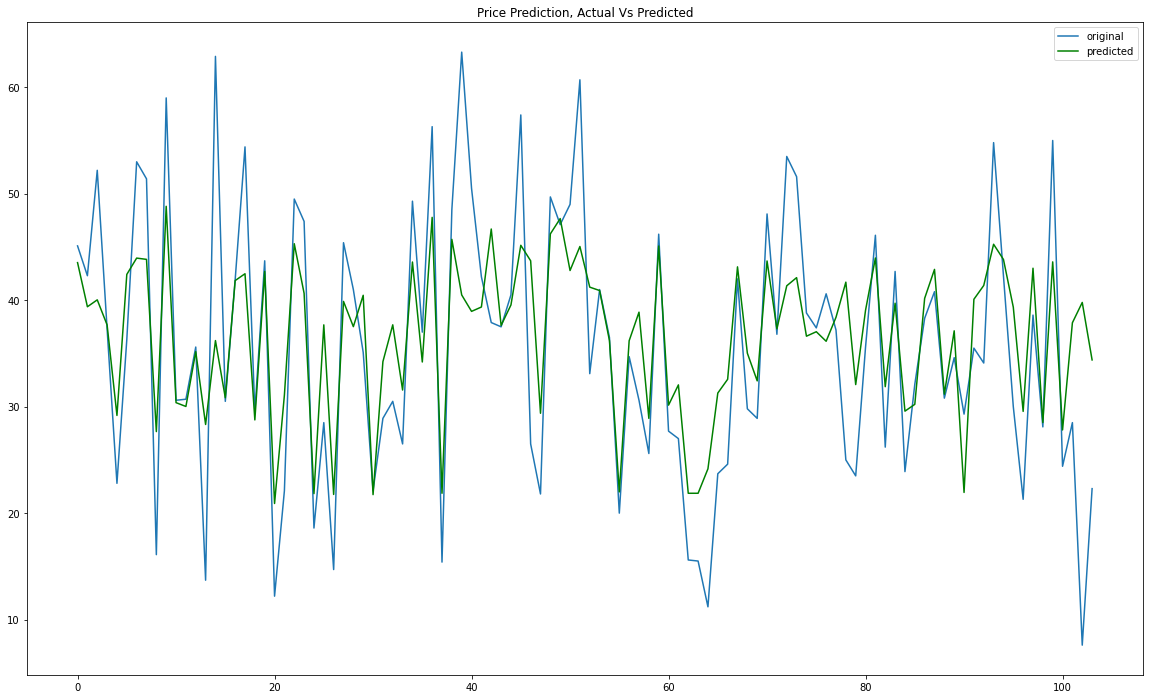

In [ ]:
plt.figure(figsize = (20, 12))
x_ax = range(len(y_test))
sns.lineplot(x = x_ax, y = y_test, label="original")
sns.lineplot(x = x_ax, y = pred_glm, label="predicted", color = 'green')
plt.title("Price Prediction, Actual Vs Predicted")
plt.legend(loc = 'upper right')
plt.show()

Random Forest

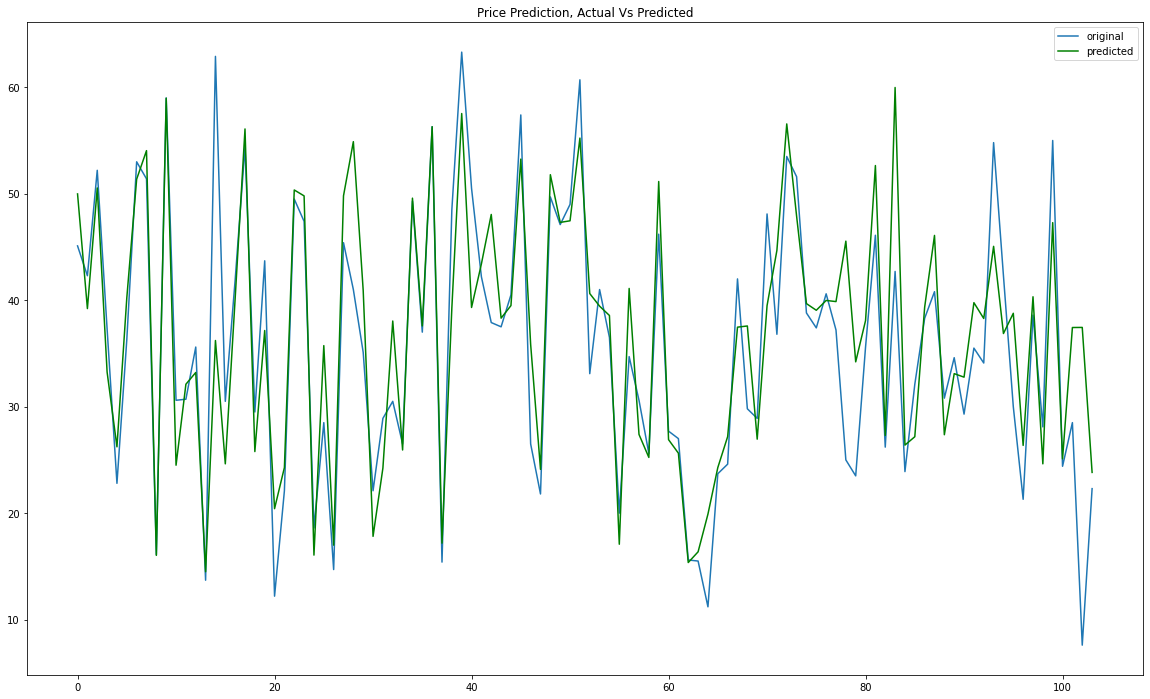

In [ ]:
plt.figure(figsize = (20, 12))
x_ax = range(len(y_test))
sns.lineplot(x = x_ax, y = y_test, label="original")
sns.lineplot(x = x_ax, y = pred_rf, label="predicted", color = 'green')
plt.title("Price Prediction, Actual Vs Predicted")
plt.legend(loc = 'upper right')
plt.show()

Decision Tree

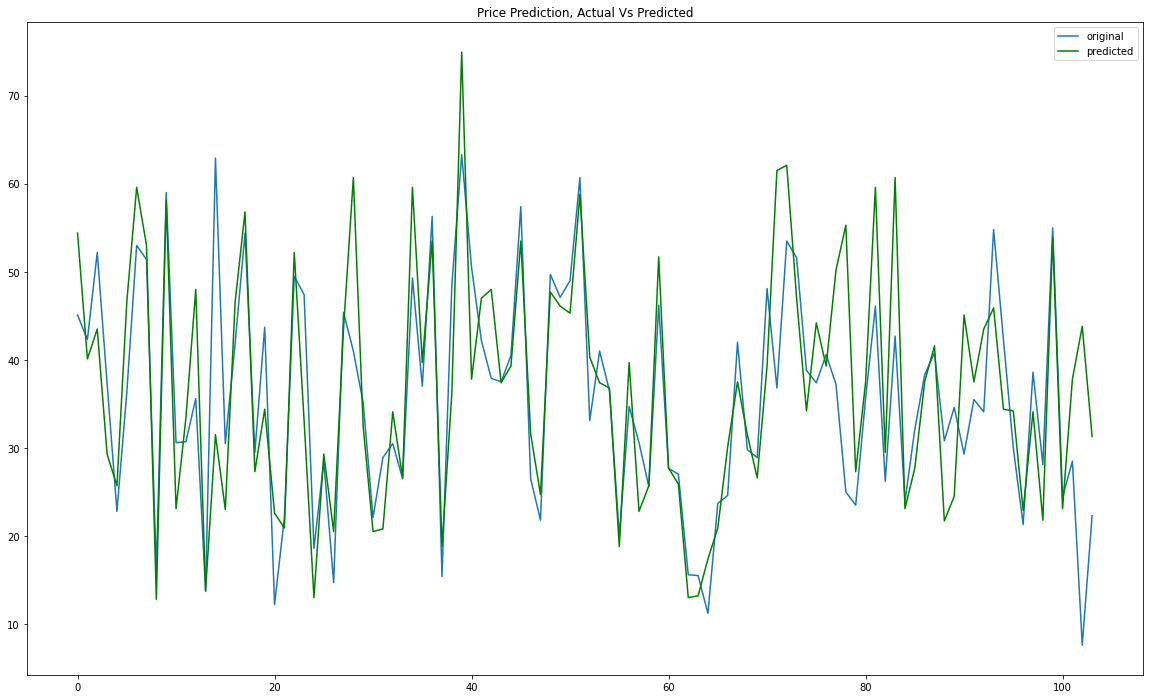

In [ ]:
plt.figure(figsize = (20, 12))
x_ax = range(len(y_test))
sns.lineplot(x = x_ax, y = y_test, label="original")
sns.lineplot(x = x_ax, y = pred_dt, label="predicted", color = 'green')
plt.title("Price Prediction, Actual Vs Predicted")
plt.legend(loc = 'upper right')
plt.show()

LR Prediction

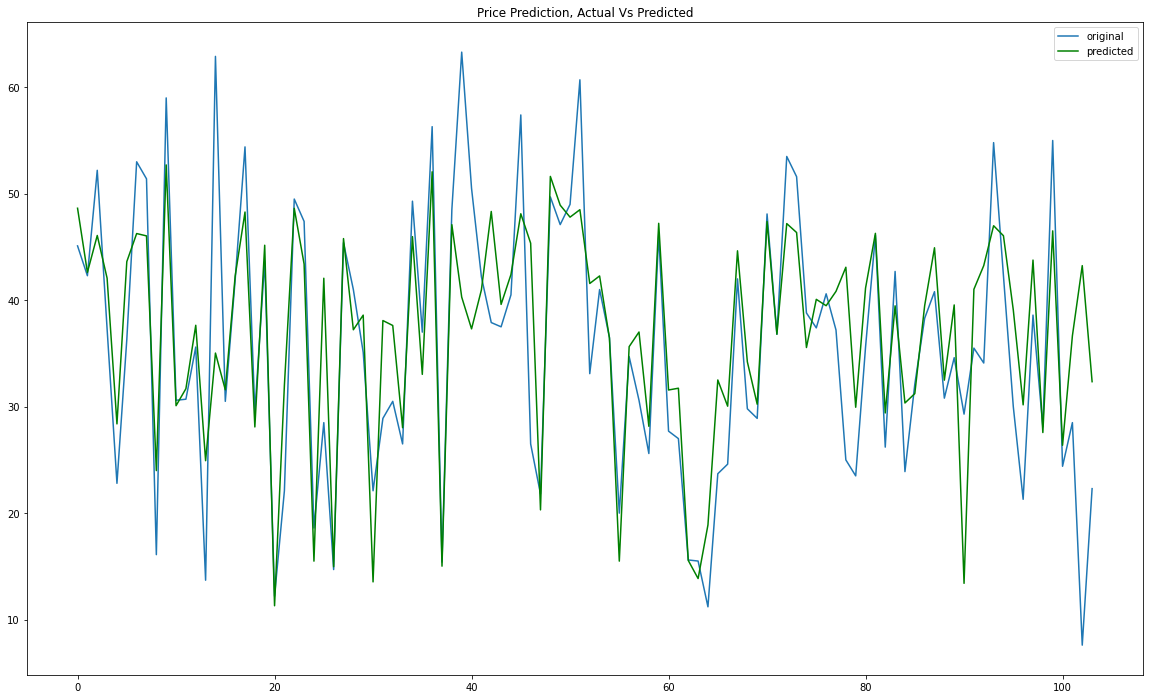

In [ ]:
plt.figure(figsize = (20, 12))
x_ax = range(len(y_test))
sns.lineplot(x = x_ax, y = y_test, label="original")
sns.lineplot(x = x_ax, y = pred_lr, label="predicted", color = 'green')
plt.title("Price Prediction, Actual Vs Predicted")
plt.legend(loc = 'upper right')
plt.show()

KNN Prediction

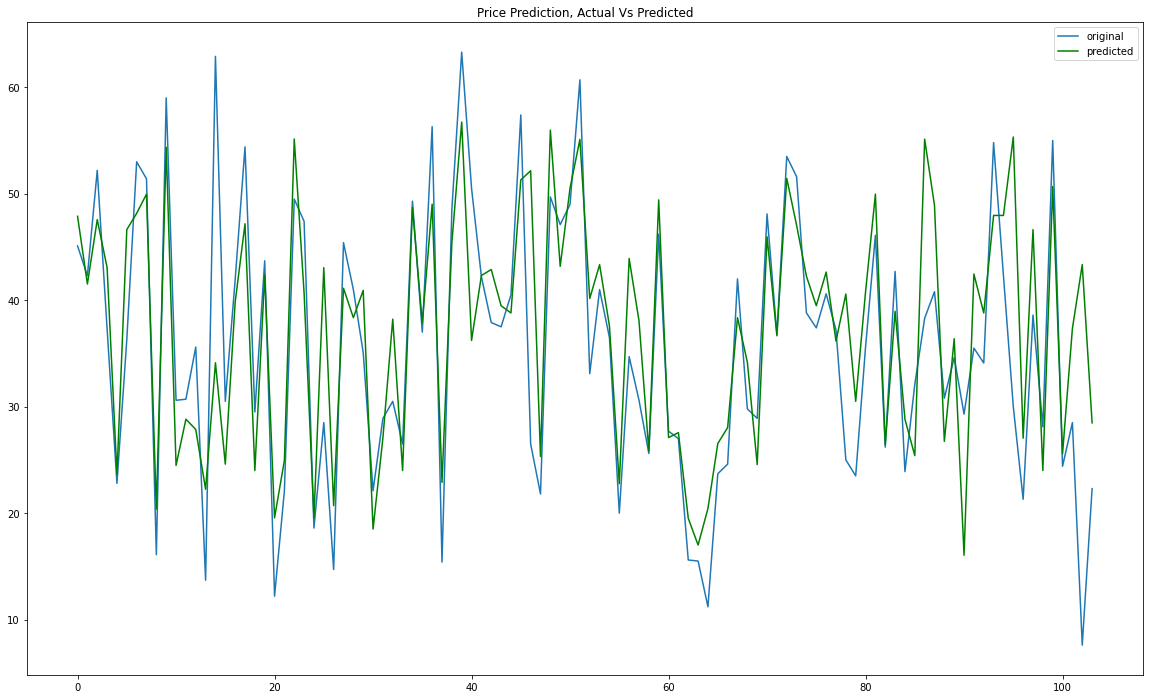

In [ ]:
plt.figure(figsize = (20, 12))
x_ax = range(len(y_test))
sns.lineplot(x = x_ax, y = y_test, label="original")
sns.lineplot(x = x_ax, y = pred_knn, label="predicted", color = 'green')
plt.title("Price Prediction, Actual Vs Predicted")
plt.legend(loc = 'upper right')
plt.show()

XGB Prediction

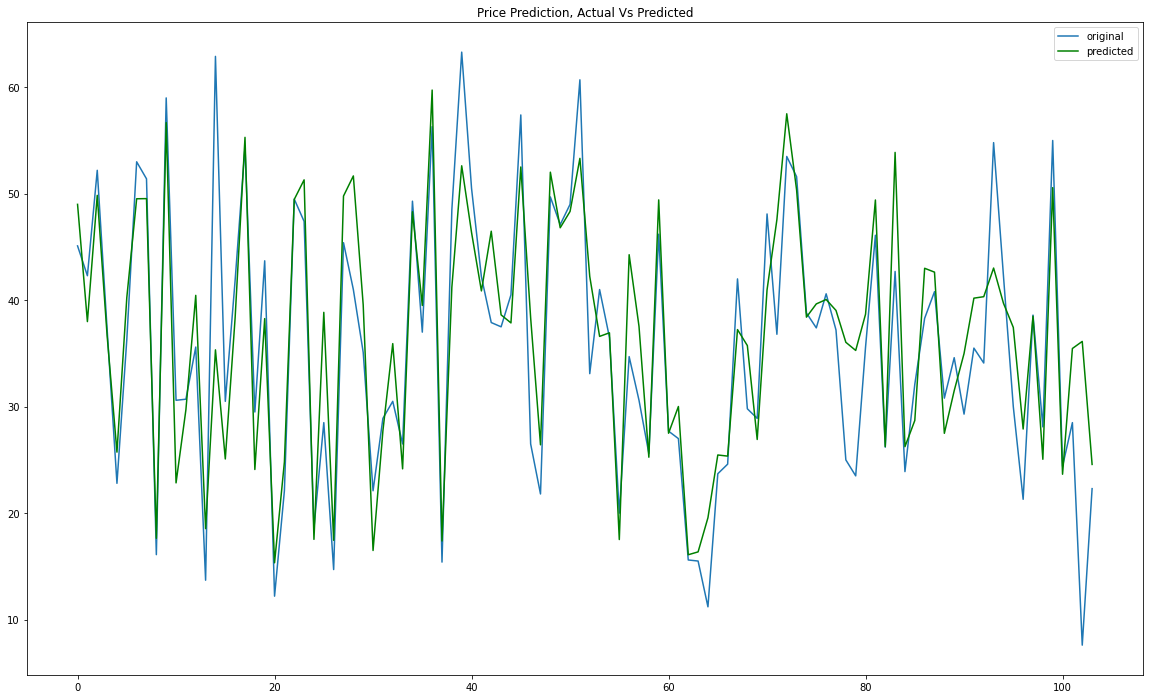

In [ ]:
plt.figure(figsize = (20, 12))
x_ax = range(len(y_test))
sns.lineplot(x = x_ax, y = y_test, label="original")
sns.lineplot(x = x_ax, y = pred_xgb, label="predicted", color = 'green')
plt.title("Price Prediction, Actual Vs Predicted")
plt.legend(loc = 'upper right')
plt.show()